In [34]:
import librosa.display
import utility_functions as utils
import importlib
from scipy.spatial.distance import jensenshannon
import pandas as pd
import numpy as np
import madmom
importlib.reload(utils)

<module 'utility_functions' from '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Audio/utility_functions.py'>

In [35]:
data_json = utils.get_all_artist_audio('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Audio/test.json')

In [36]:
data_json

Path  \
0     /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
1     /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
2     /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
3     /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
4     /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
...                                                 ...   
1044  /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
1045  /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
1046  /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
1047  /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   
1048  /Users/borosabel/Documents/Uni/Thesis/PopMIR/D...   

                                                   Name  Duration (s)  \
0                                        8 Iz Enuff.mp3    298.840000   
1                                      Da Graveyard.mp3    323.760000   
2                             I Don't Understand It.mp3    260.226667   
3                                 No Endz, No Skinz.mp3    208.733333   
4                                               MVP.mp3    218.866667   
...                                                 ...           ...   
1044  Dr. Dre - Stranded On Death Row (feat. Bushwic...    287.335333   
1045  Dr. Dre - Nuthin' but a ＂G＂ Thang (feat. Snoop...    238.677917   
1046                 Dr. Dre - The $20 Sack Pyramid.mp3    173.302146   
1047  Dr. Dre - The Doctor's Office (Skit) (feat. Je...     64.005813   
1048  Dr. Dre - The Roach (ft. Ruben Cruz, Daz Dilli...    277.072125   

      Sample Rate (Hz) Release Year  
0                48000         1995  
1                48000         1995  
2                48000         1995  
3                48000         1995  
4                48000         1995  
...                ...          ...  
1044             48000         1992  
1045             48000         1992  
1046             48000         1992  
1047             48000         1992  
1048             48000         1992  

[1049 rows x 5 columns]

In [3]:
coast = []

for index, value in data_json.iterrows():
    audio_path = value['FilePath']
    coast.append(audio_path.split('/')[-4])
    
data_json['Coast'] = coast

In [23]:
data_east = data_json[data_json['Coast'] == 'east_coast']
data_west = data_json[data_json['Coast'] == 'west_coast']

num_songs_east = data_east.shape[0]
num_songs_west = data_west.shape[0]

distance_matrix_east = np.zeros((num_songs_east, num_songs_east))
distance_matrix_west = np.zeros((num_songs_west, num_songs_west))

In [24]:
# Compare each song with every other song
for i in range(num_songs_east):
    for j in range(num_songs_east):
        # No need to compare the same songs, or redo comparisons (matrix is symmetric)
        if i >= j:
            continue

        # Extract the distributions
        dist_i = data_east.iloc[i]['MFCC_Distribution']
        dist_j = data_east.iloc[j]['MFCC_Distribution']

        # Compute the Jensen-Shannon distance
        distance = jensenshannon(dist_i, dist_j)

        # Store the distance in the matrix
        distance_matrix_east[i, j] = distance
        distance_matrix_east[j, i] = distance

In [25]:
# Compare each song with every other song
for i in range(num_songs_west):
    for j in range(num_songs_west):
        # No need to compare the same songs, or redo comparisons (matrix is symmetric)
        if i >= j:
            continue

        # Extract the distributions
        dist_i = data_west.iloc[i]['MFCC_Distribution']
        dist_j = data_west.iloc[j]['MFCC_Distribution']

        # Compute the Jensen-Shannon distance
        distance = jensenshannon(dist_i, dist_j)

        # Store the distance in the matrix
        distance_matrix_west[i, j] = distance
        distance_matrix_west[j, i] = distance

In [6]:
mfcc_distributions = []

for index, value in data_json.iterrows():
    audio_path = value['FilePath']
    y, sr = librosa.load(audio_path, sr=22050)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc1_mean = mfcc.mean(axis=1, keepdims=True)
    mfcc1_std = mfcc.std(axis=1, keepdims=True)
    mfcc1_normalized = (mfcc - mfcc1_mean) / mfcc1_std
    mfcc1_avg = np.mean(mfcc1_normalized, axis=1)
    mfcc1_positive = mfcc1_avg - np.min(mfcc1_avg)
    
    mfcc_distribution = mfcc1_positive / np.sum(mfcc1_positive)
    mfcc_distributions.append(mfcc_distribution)

data_json['MFCC_Distribution'] = mfcc_distributions

In [7]:
num_songs = data_json.shape[0]
# Initialize a matrix of zeros with the shape of num_songs x num_songs
distance_matrix = np.zeros((num_songs, num_songs))

In [8]:
# Compare each song with every other song
for i in range(num_songs):
    for j in range(num_songs):
        # No need to compare the same songs, or redo comparisons (matrix is symmetric)
        if i >= j:
            continue

        # Extract the distributions
        dist_i = data_json.iloc[i]['MFCC_Distribution']
        dist_j = data_json.iloc[j]['MFCC_Distribution']

        # Compute the Jensen-Shannon distance
        distance = jensenshannon(dist_i, dist_j)

        # Store the distance in the matrix
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

In [9]:
distance_matrix

array([[0.        , 0.12869434, 0.18021662, ..., 0.20785944, 0.25899083,
        0.23828688],
       [0.12869434, 0.        , 0.24588594, ..., 0.24142909, 0.25939933,
        0.29292801],
       [0.18021662, 0.24588594, 0.        , ..., 0.24799288, 0.3353016 ,
        0.25377227],
       ...,
       [0.20785944, 0.24142909, 0.24799288, ..., 0.        , 0.2509826 ,
        0.23003411],
       [0.25899083, 0.25939933, 0.3353016 , ..., 0.2509826 , 0.        ,
        0.30313384],
       [0.23828688, 0.29292801, 0.25377227, ..., 0.23003411, 0.30313384,
        0.        ]])

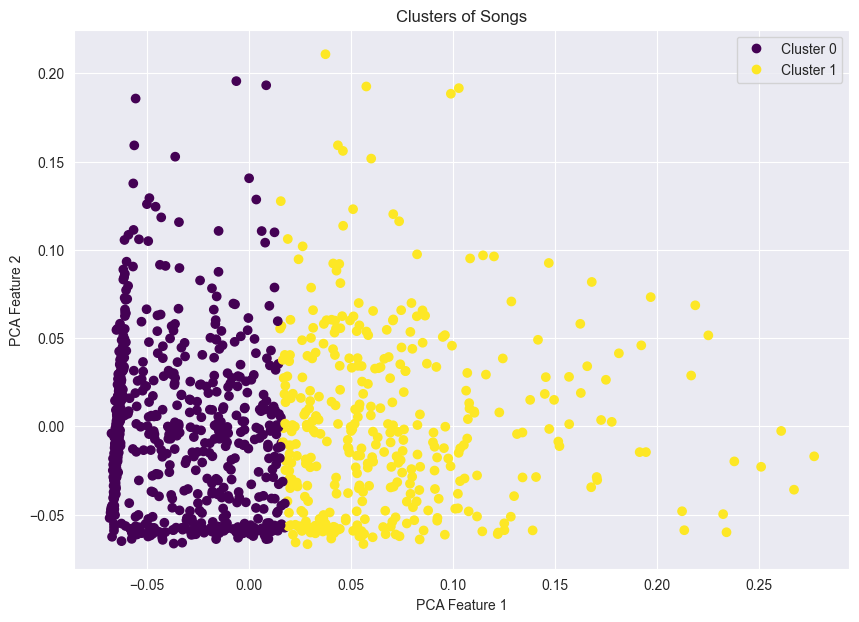

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming `data_json` is your DataFrame and each row in the 'MFCC_Distribution' column
# is a list or a NumPy array of MFCC distribution values.

# Stack all MFCC distributions into a 2D NumPy array for PCA
mfcc_features = np.stack(data_json['MFCC_Distribution'].values)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
mfcc_reduced = pca.fit_transform(mfcc_features)

# Now use K-Means to cluster the reduced data
num_clusters = 2  # for example, you could use the elbow method to choose the right number
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(mfcc_reduced)

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(mfcc_reduced[:, 0], mfcc_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Songs')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

In [11]:
east_west = []

for index, value in data_json.iterrows():
    audio_path = value['FilePath'].split('/')[-4]
    east_west.append(0 if audio_path == 'east_coast' else 1)

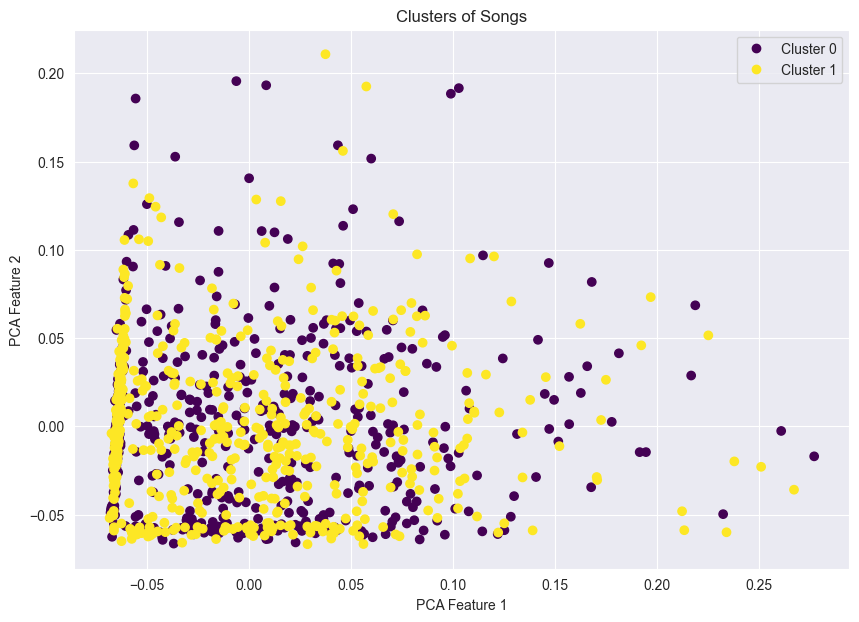

In [12]:
# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(mfcc_reduced[:, 0], mfcc_reduced[:, 1], c=east_west, cmap='viridis')
plt.title('Clusters of Songs')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

In [13]:
artists = []

for index, value in data_json.iterrows():
    artist = value['FilePath'].split('/')[-3]
    artists.append(artist)

In [14]:
aritsts_clusters = list(dict.fromkeys(artists))
artist_to_number = {artist: idx for idx, artist in enumerate(dict.fromkeys(artists))}
number_list = [artist_to_number[artist] for artist in artists]

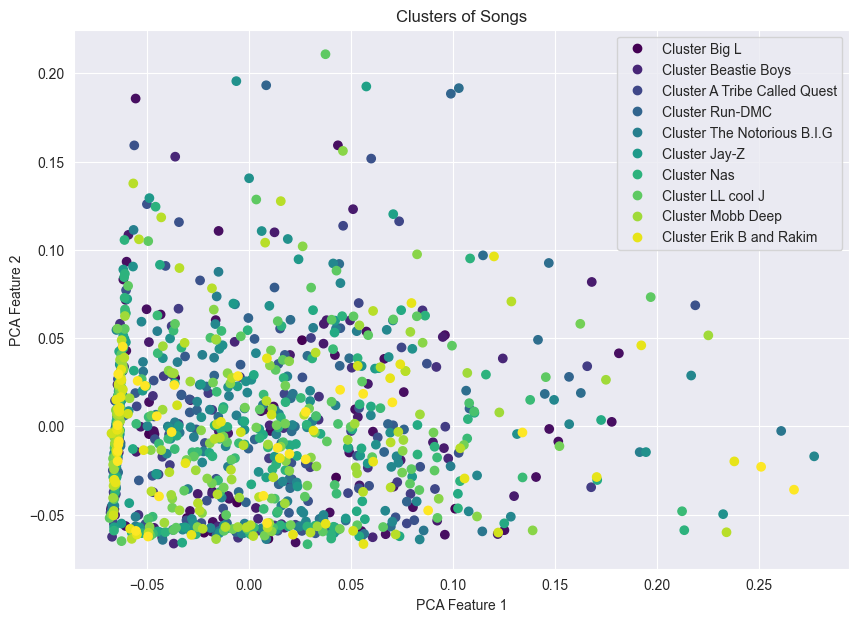

In [15]:
# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(mfcc_reduced[:, 0], mfcc_reduced[:, 1], c=number_list, cmap='viridis')
plt.title('Clusters of Songs')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in aritsts_clusters])
plt.show()

In [16]:
from sklearn.decomposition import PCA

# Assuming `data_json` is your DataFrame and each row in the 'MFCC_Distribution' column
# is a list or a NumPy array of MFCC distribution values.

# Stack all MFCC distributions into a 2D NumPy array for PCA
mfcc_features = np.stack(data_json['MFCC_Distribution'].values)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=3)
mfcc_reduced = pca.fit_transform(mfcc_features)

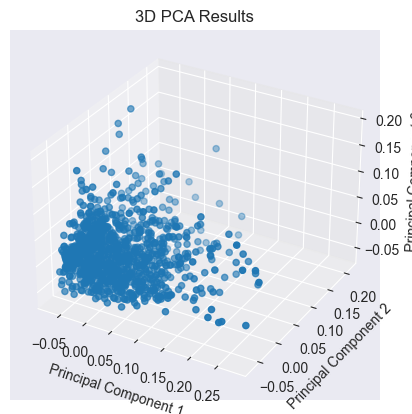

In [17]:

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results
ax.scatter(mfcc_reduced[:, 0], mfcc_reduced[:, 1], mfcc_reduced[:, 2])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('3D PCA Results')
plt.show()

In [18]:
import plotly.express as px
df = pd.DataFrame(mfcc_reduced, columns=['PC1', 'PC2', 'PC3'])
df['Category'] = east_west  # Add the category to the dataframe

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Category',
                    title='Interactive 3D PCA Plot',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'})

# Show the plot
fig.show()

/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/borosabel/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



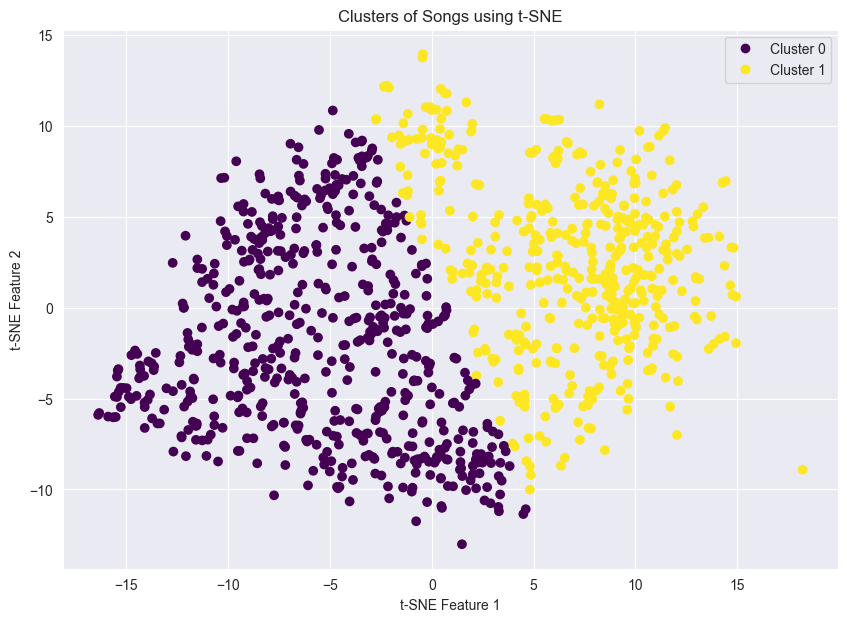

In [19]:
from sklearn.manifold import TSNE

# Assuming `data_json` and other setups are as defined in your query

# Perform t-SNE to reduce dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)  # adjust these parameters as needed
mfcc_reduced_tsne = tsne.fit_transform(mfcc_features)

# Use K-Means to cluster the reduced data
kmeans_tsne = KMeans(n_clusters=num_clusters)
clusters_tsne = kmeans_tsne.fit_predict(mfcc_reduced_tsne)

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(mfcc_reduced_tsne[:, 0], mfcc_reduced_tsne[:, 1], c=clusters_tsne, cmap='viridis')
plt.title('Clusters of Songs using t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(handles=scatter_tsne.legend_elements()[0], labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

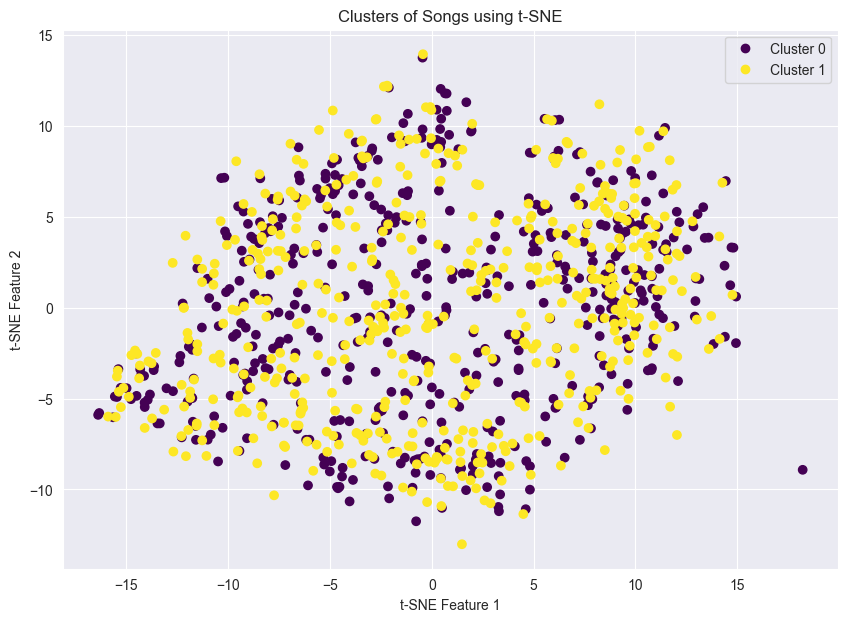

In [20]:
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(mfcc_reduced_tsne[:, 0], mfcc_reduced_tsne[:, 1], c=east_west, cmap='viridis')
plt.title('Clusters of Songs using t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(handles=scatter_tsne.legend_elements()[0], labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

In [21]:
distance_matrix

array([[0.        , 0.12869434, 0.18021662, ..., 0.20785944, 0.25899083,
        0.23828688],
       [0.12869434, 0.        , 0.24588594, ..., 0.24142909, 0.25939933,
        0.29292801],
       [0.18021662, 0.24588594, 0.        , ..., 0.24799288, 0.3353016 ,
        0.25377227],
       ...,
       [0.20785944, 0.24142909, 0.24799288, ..., 0.        , 0.2509826 ,
        0.23003411],
       [0.25899083, 0.25939933, 0.3353016 , ..., 0.2509826 , 0.        ,
        0.30313384],
       [0.23828688, 0.29292801, 0.25377227, ..., 0.23003411, 0.30313384,
        0.        ]])

In [22]:
# Mask the diagonal to exclude self-comparison (if needed)
np.fill_diagonal(distance_matrix, np.nan)

# Calculate the average divergence
average_divergence = np.nanmean(distance_matrix)

print(f"The average Jensen-Shannon divergence between the songs is: {average_divergence}")

The average Jensen-Shannon divergence between the songs is: 0.27043769724917255


In [26]:
# Mask the diagonal to exclude self-comparison (if needed)
np.fill_diagonal(distance_matrix_east, np.nan)

# Calculate the average divergence
average_divergence = np.nanmean(distance_matrix_east)

print(f"The average Jensen-Shannon divergence between the east songs is: {average_divergence}")

The average Jensen-Shannon divergence between the east songs is: 0.27027831693504867


In [27]:
# Mask the diagonal to exclude self-comparison (if needed)
np.fill_diagonal(distance_matrix_west, np.nan)

# Calculate the average divergence
average_divergence = np.nanmean(distance_matrix_west)

print(f"The average Jensen-Shannon divergence between the west songs is: {average_divergence}")

The average Jensen-Shannon divergence between the west songs is: 0.27075206089166887
